# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat6"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.4021102786064148
Epoch 1, Loss 1.3952279090881348
Epoch 2, Loss 1.414538025856018
Epoch 3, Loss 1.426908254623413
Epoch 4, Loss 1.4085283279418945
Epoch 5, Loss 1.4139501452445984
Epoch 6, Loss 1.4200127720832825
Epoch 7, Loss 1.3969139456748962
Epoch 8, Loss 1.4205120205879211
Epoch 9, Loss 1.3917900323867798
Epoch 10, Loss 1.3918544054031372
Epoch 11, Loss 1.389766812324524
Epoch 12, Loss 1.4096606373786926
Epoch 13, Loss 1.3749316930770874
Epoch 14, Loss 1.4152678847312927
Epoch 15, Loss 1.4002627730369568
Epoch 16, Loss 1.413550317287445
Epoch 17, Loss 1.4128664135932922
Epoch 18, Loss 1.4038886427879333
Epoch 19, Loss 1.415375530719757
Epoch 20, Loss 1.4059306383132935
Epoch 21, Loss 1.414890706539154
Epoch 22, Loss 1.3954535126686096
Epoch 23, Loss 1.395520806312561
Epoch 24, Loss 1.4030548334121704
Epoch 25, Loss 1.4157609939575195
Epoch 26, Loss 1.394318699836731
Epoch 27, Loss 1.3977605104446411
Epoch 28, Loss 1.415405035018921
Epoch 29, Loss 1.3961046934127808

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

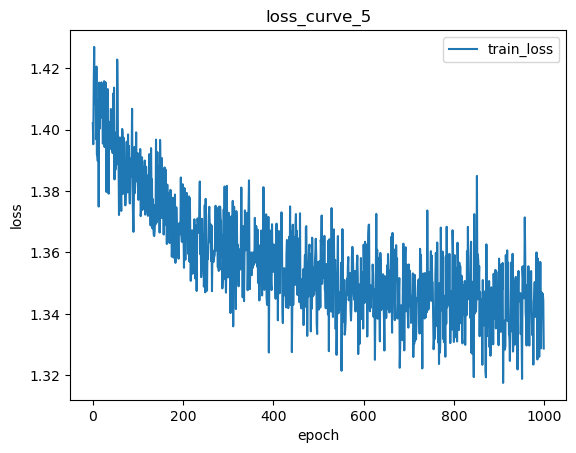

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[18, 28], [18, 32]]
Accuracy for class 0 = 39.130434782608695%
Accuracy for class 1 = 64.0%
Overall accuracy = 52.083333333333336%


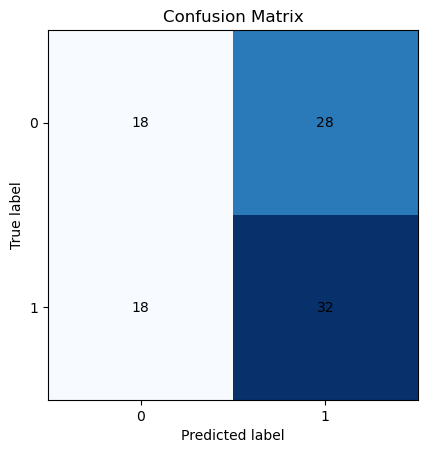

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

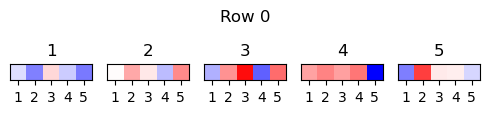

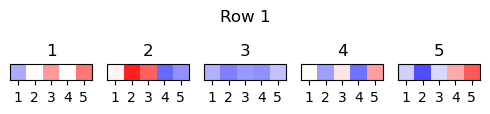

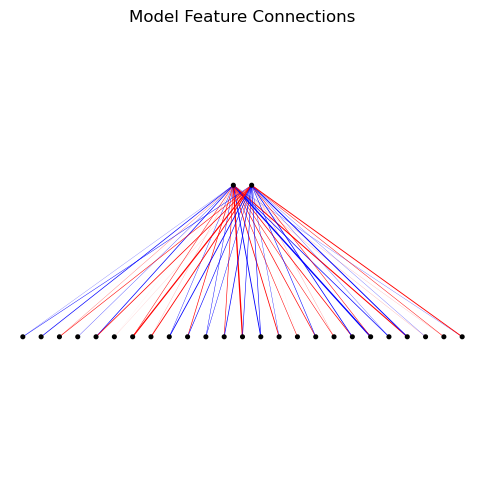

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()